# **💡DATA SCHOOL PROJECT07**  
**┗ Airbnb 집 값 분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* ⚙️Process01
* ⚙️Process02
* ⚙️Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ Airbnb 집 값 분석
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 인사이트 추출
```

> **학습목표**

```
▶ Airbnb의 숙소 가격에 영향을 미치는 주요 요인들을 파악
▶ 지역별, 방 유형별 가격 분포의 차이를 분석
▶ 호스트의 활동 정도와 숙소 가격 간의 상관관계를 이해
▶ 리뷰 수와 최근 리뷰의 영향도 분석
▶ 예약 가능 일수와 숙소의 가격간의 관계를 탐색
```

## **문제상황 Introduction**
---

> **시나리오** 📠

```
A사는 글로벌 숙박 공유 플랫폼 사업을 시작하려고 합니다. Airbnb와 유사한 서비스를 제공하면서, 시장에 빠르게 진입하고 경쟁력을 가지기 위해 Airbnb의
데이터를 분석하려고 합니다. A사는 특히 숙소의 가격 결정 요인에 관심이 있습니다.
```  

> **문제정의**

```
▶ 신규 사업 진입을 위한 시장 조사 데이터 부재
```  

> **기대효과**

```
▶ 숙소의 가격을 결정하는 주요 요인을 파악함으로써, 시장에 빠르게 적응하고, 유저에게 합리적인 가격을 제시할 수 있음

```

> **해결방안**

```
▶ Airbnb 데이터를 통한 EDA를 수행하여 숙소 가격에 영향을 미치는 변수들을 파악하고, 이를 바탕으로 가격 예측 모델을 구축

```

> **성과측정**  

```
▶ 분석을 통해 도출된 주요 요인들이 실제 시장에서의 가격 변동성과 얼마나 일치하는지 비교 및 평가
```

> **운영**  

```
▶ 주기적으로 새로운 데이터를 수집하고 분석하여, 가격 결정 요인의 변화나 새로운 트렌드를 신속하게 파악하고 반영
```

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df=pd.read_csv('../data/S_PJT07_DATA.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


> **데이터 살펴보기**

* 데이터 명세 ⬇

| Column                         | Description                           |
|:------------------------------|:--------------------------------------|
| id                            | 리스트 ID                              |
| name                          | 리스트의 이름                           |
| host_id                       | 호스트 ID                              |
| host_name                     | 호스트의 이름                           |
| neighbourhood_group           | 위치                                   |
| neighbourhood                 | 지역                                   |
| latitude                      | 위도 좌표                               |
| longitude                     | 경도 좌표                               |
| room_type                     | 리스트 공간 유형                         |
| price                         | 가격 (달러 기준)                         |
| minimum_nights                | 최소 숙박 박수                           |
| number_of_reviews             | 리뷰 수                                |
| last_review                   | 최근 리뷰 날짜                          |
| reviews_per_month             | 월별 리뷰 수                            |
| calculated_host_listings_count| 호스트당 리스트 수                       |
| availability_365              | 예약 가능한 일수 (1년 기준)              |




## **💡Process01**  
**┗ Data Info check**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [56]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [57]:
# ▶ Null 값 확인
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [58]:
# 분석에 필요한 Col 선택 및 Null value 처리
df['reviews_per_month'].fillna(0, inplace=True)

In [59]:
#  Outlier 확인
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [60]:
#  48,895, 16
df.shape

(48895, 16)

### · Data EDA
---
> **수집된 데이터의 기본 정보들을 확인**

```
* Target 변수 탐색
* 숫자형 변수와 범주형 변수 탐색
```

In [61]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [62]:
#numerical, categorical value divide

numerical_list=[]
categorical_list=[]

for i in df.columns:
    if df[i].dtypes =='O':
        categorical_list.append(i)
    else:
        numerical_list.append(i)

print('numeric :',numerical_list)
print('categoric :',categorical_list)


numeric : ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categoric : ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [63]:
# numerica _list value unique 값 확인(1)
for i in numerical_list:
    print(i, ":",df[i].nunique())

id : 48895
host_id : 37457
latitude : 19048
longitude : 14718
price : 674
minimum_nights : 109
number_of_reviews : 394
reviews_per_month : 938
calculated_host_listings_count : 47
availability_365 : 366


In [64]:
# numerical_list value unique 값 확인(2)
list_of_df=[]

for i in numerical_list :
    loof_df=pd.DataFrame({'val' : [i],
                          'nunique':df[i].nunique()})
    list_of_df.append(loof_df)

df_merge= pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'],ascending=False)


,val,nunique
0,id,48895
1,host_id,37457
2,latitude,19048
3,longitude,14718
7,reviews_per_month,938
4,price,674
6,number_of_reviews,394
9,availability_365,366
5,minimum_nights,109
8,calculated_host_listings_count,47


In [65]:
#  categorical_list value unique 값 확인 (1)
list_of_df = []

for i in categorical_list :
 loof_df = pd.DataFrame({'val' : [i],
                         'nunique': df[i].nunique()})
 list_of_df.append(loof_df)

df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
0,name,47905
1,host_name,11452
5,last_review,1764
3,neighbourhood,221
2,neighbourhood_group,5
4,room_type,3


## **💡Process02**  
**┗ Data Readiness Check & Feature Engineering**  
---

### · Data Readiness Check
---
> 현재 가지고 있는 데이터의 수준으로 문제를 해결할 수 있는지 점검

```
(1) Target label 생성
(2) Target Ratio 확인
(3) 분석 방향성 결정
```

In [66]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


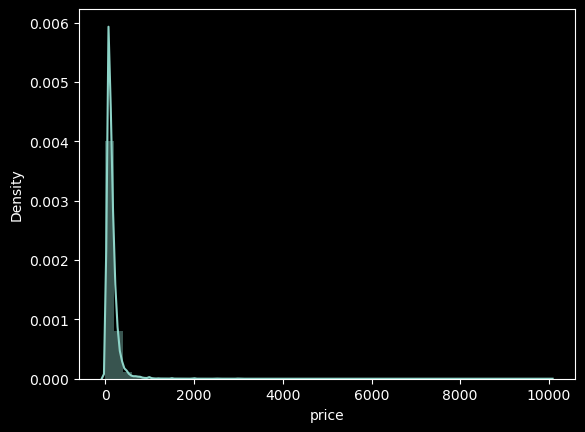

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

display(pd.DataFrame(df['price'].describe()))
sns.distplot(df['price']);

In [68]:
categorical_list


['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [69]:
# sample col eda
eda_df1 = df.groupby('neighbourhood_group')['price'].agg(price_mean =('mean')).reset_index()
eda_df1

,neighbourhood_group,price_mean
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


### · Feature Engineering
---
> **Target 변수와의 의미있는 변수 선택하는 방법**

```
* Classification(분류) : bin(통)으로 구분 후 Target 변수와의 관계 파악
* Regression(회귀) : Target 변수와의 correlation을 확인하거나 bin(통)으로 구분 후 Target 변수와의 관계 파악
```

> #### **└ Numerical features**

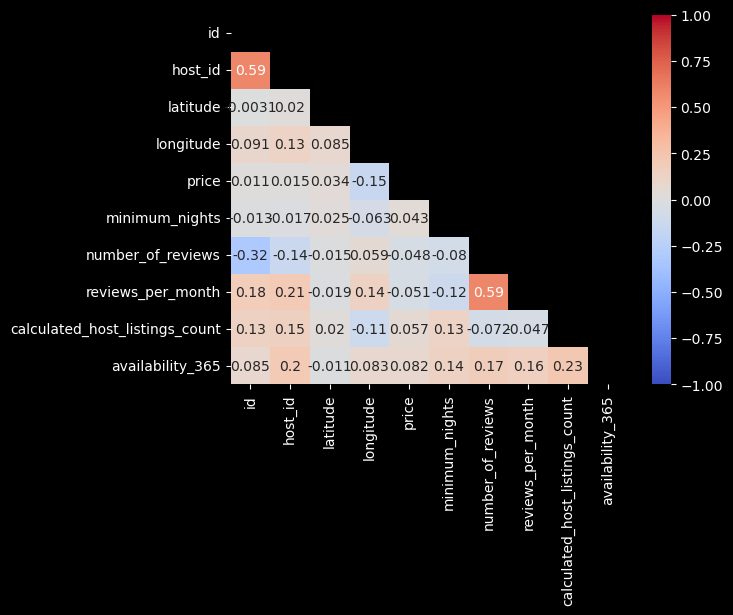

In [70]:
# ▶ heatmap plot
import seaborn as sns
# ▶ 모든 조합, 상관계수 표현
df_pair = df[numerical_list]
mask = np.triu(np.ones_like(df_pair.corr(), dtype=bool))
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = mask);
# plt.gcf().set_size_inches(10, 10)

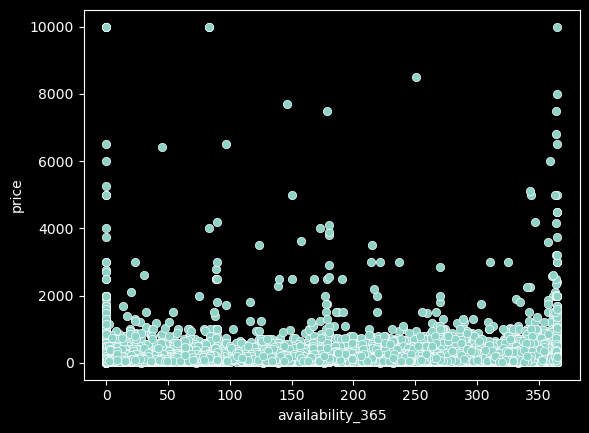

In [71]:
# ▶ scatter plot(Followers & Followers_gained)
sns.scatterplot(data = df, x='availability_365', y='price');

In [72]:
# ▶ 연속형 변수를 3등분하여 그룹핑
df['grouped_var'] = pd.cut(df['availability_365'], 3, labels=['Low', 'Medium', 'High'])

# ▶ 그룹핑 기준으로 특정 컬럼의 평균값 계산
mean_values = df.groupby('grouped_var')['price'].mean()
print(mean_values)

grouped_var
Low       138.958384
Medium    165.994545
High      181.618214
Name: price, dtype: float64


> #### **└ Categorical features**

In [73]:
df[categorical_list].head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


,neighbourhood_group,mean
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


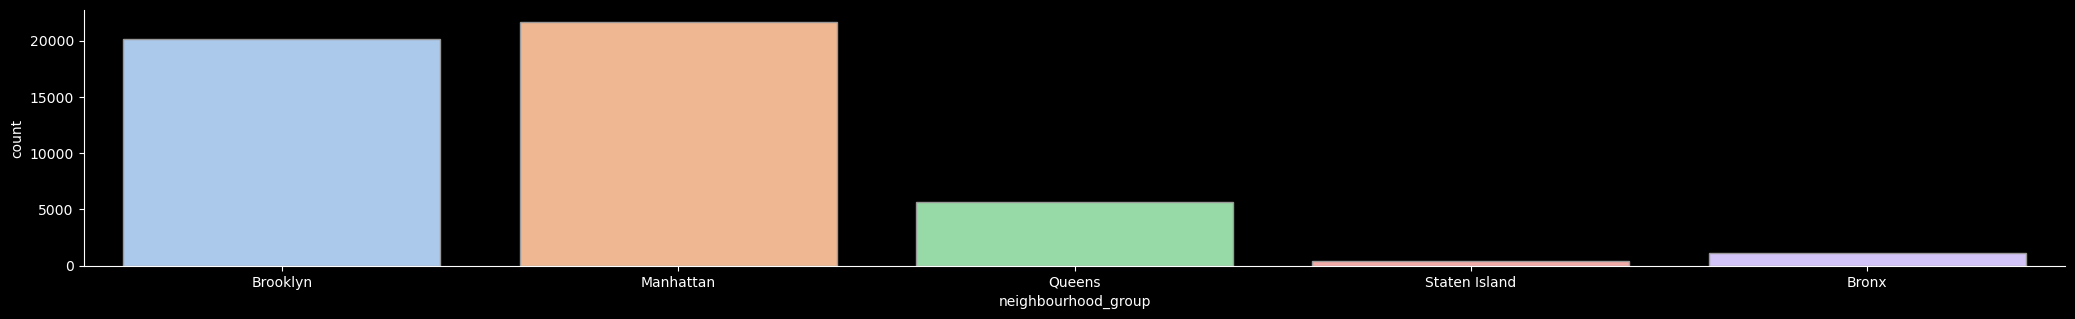

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ target 기준(hue,색상)으로 구분하여 Plot
sns.catplot(x="neighbourhood_group", kind="count",palette="pastel", edgecolor=".6",data=df);
# plt.xticks(rotation=-20)
plt.gcf().set_size_inches(25, 3)

# ▶ sample col eda
eda_df = df.groupby('neighbourhood_group')['price'].agg(mean =('mean')).reset_index()
display(eda_df)

## **💡Process03**  
**┗ Modeling Process**   
---



> **데이터 사전 준비**

```
* 모델은 숫자로 이루어진 형태의 Data만 인식 가능 (※ 문자형 변수 인코딩 필요)
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할
* Categorical value 인코딩
```
> **Model Selection (Regression)**

```
* 선형회귀 모델 (Ridge, Lasso, Elastic Net)
* 비선형회귀 모델 (polynomial, log모형)
* Tree 계열 Regression 모델
  - bagging 앙상블 (Randomforest)
  - boosting 앙상블 (lightGBM)
```


> **Model 학습**

```
* Model Selection 단계에서 선정한 모델들을 학습하고 성능을 기록
* 동일한 Data set, 동일한 환경에서 동일한 비교 지표로 성능을 비교
```

> #### **└ 데이터 사전 준비**

In [74]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,grouped_var
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Low


In [87]:
from sklearn.model_selection import train_test_split

X = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price', 'last_review','grouped_var'], axis=1)
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(34226, 8)
(34226,)
(14669, 8)
(14669,)


In [88]:
from sklearn.preprocessing import LabelEncoder

categorical_list = ['neighbourhood_group', 'neighbourhood', 'room_type']

for col in categorical_list :
  encoder = LabelEncoder()
  encoder.fit(x_train[[col]])

  # 기존 Col 대체
  x_train[col] = encoder.transform(x_train[col])
  x_test[col] = encoder.transform(x_test[col])

In [89]:
x_train.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
39351,2,198,1,1,53,7.64,3,2
26399,0,213,1,1,70,3.55,1,283
47430,1,60,1,1,1,1.00,2,151
24944,2,61,1,30,5,0.24,4,211
35442,2,73,0,29,0,0.00,96,311


In [90]:
x_test.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
36514,0,111,1,2,0,0.00,4,364
48599,1,214,1,3,0,0.00,1,7
34181,1,214,0,5,5,0.46,1,198
21356,3,4,1,3,23,0.81,1,23
4887,1,214,0,5,19,0.32,1,268


In [91]:
y_train.head()

39351     55
26399     60
47430     40
24944     41
35442    299
Name: price, dtype: int64

> #### **└ 모델 학습**

In [92]:
#  RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfc = RandomForestRegressor()
rfc.fit(x_train, y_train)

#  예측 및 성능 확인
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(metrics.r2_score(y_train, y_pred_train))
print(metrics.r2_score(y_test, y_pred_test))

0.8001281220815147
-0.004460293416682859


In [93]:
# ▶ 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

print("[Train]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

[Train]
Mean Absolute Error: 31.4193462000367
Mean Squared Error: 13282.422292988591
Root Mean Squared Error: 115.24939172502643
------------------------------------------
[Test]
Mean Absolute Error: 68.91298213579626
Mean Squared Error: 37338.692472658375
Root Mean Squared Error: 193.23222420874416


> #### **└ 하이퍼 파라미터 튜닝**

In [94]:
!pip install bayesian-optimization


[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [95]:
#  BayesianOptimization
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score


def model_evaluate(n_estimators, maxDepth):
    clf = RandomForestRegressor(
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    return np.mean(scores)


def bayesOpt(x_train, y_train):
    clfBO = BayesianOptimization(model_evaluate, {'n_estimators':  (100, 300),
                                                  'maxDepth': (2, 8)
                                                 })
    clfBO.maximize(init_points=5, n_iter=10)
    print(clfBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.1293    | 7.124     | 224.5     |
| 2         | 0.1141    | 5.319     | 299.9     |
| 3         | 0.08024   | 4.62      | 252.2     |
| 4         | 0.06529   | 3.426     | 160.0     |
| 5         | 0.07588   | 2.048     | 275.6     |
| 6         | 0.1303    | 7.438     | 225.4     |
| 7         | 0.1245    | 8.0       | 100.0     |
| 8         | 0.07599   | 2.0       | 118.6     |
| 9         | 0.1232    | 8.0       | 202.4     |
| 10        | 0.07606   | 2.163     | 189.1     |
| 11        | 0.07606   | 2.0       | 211.1     |
| 12        | 0.07632   | 2.0       | 227.9     |
| 13        | 0.07843   | 4.137     | 101.2     |
| 14        | 0.1314    | 6.999     | 199.7     |
| 15        | 0.0899    | 4.087     | 201.3     |
[{'target': 0.12928490685554733, 'params': {'maxDepth': 7.123835740161091, 'n_estimators': 224.45538169444922}}, {'target': 0.11408683676249136, 'para

In [ ]:
#  RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfc = RandomForestRegressor(max_depth = 8, n_estimators = 100)
rfc.fit(x_train, y_train)

# ▶ 예측 및 성능 확인
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(metrics.r2_score(y_train, y_pred_train))
print(metrics.r2_score(y_test, y_pred_test))

print("[Train]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

### · Summary
---
> **모델 해석 및 현업 Operation 설계**

```
* 최종 선택된 모델의 중요 변수 탐색
* 모델 Operation Check 사항 점검
```

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_ # light GBM : feature_importances()
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()